In [13]:
from QAOAUtils import *
import pickle as pkl
from oputils import *

In [14]:
DATA = []
ws_list = ['GW2','GW3','BM2','BM3']
n = 17
rotation_options = list(range(n))+[None]
count=1000

In [15]:
def PO_A():
    price_data = geometric_brownian_prices(max_drift=0.05,max_volatility=0.2,T=250,N=n-1)
    price_data = np.random.permutation(price_data.T).T
    mu,sigma=mu_sigma(price_data)
    _, Q = simple_PO_QUBO(mu,sigma,q=0.5,B=None)
    return dual_graph(Q)
comparison_data,best_angle_data,ws_data,A_list = depth0_ws_comp(n,A_func= PO_A,ws_list = ws_list,rotation_options = rotation_options,count=count)
DATA+=[comparison_data,best_angle_data,ws_data,A_list]

  0%|          | 0/1000 [00:00<?, ?it/s]

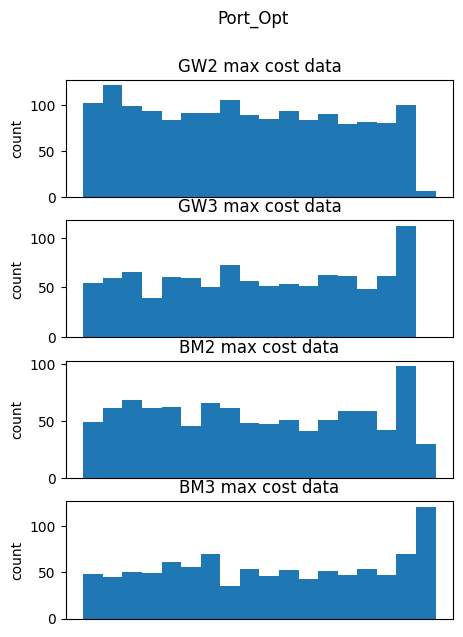

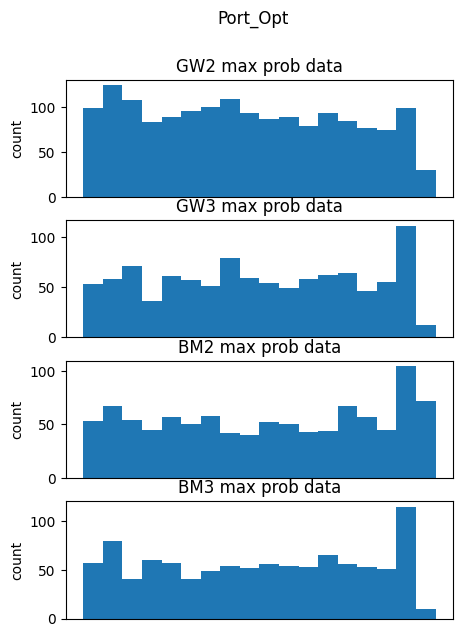

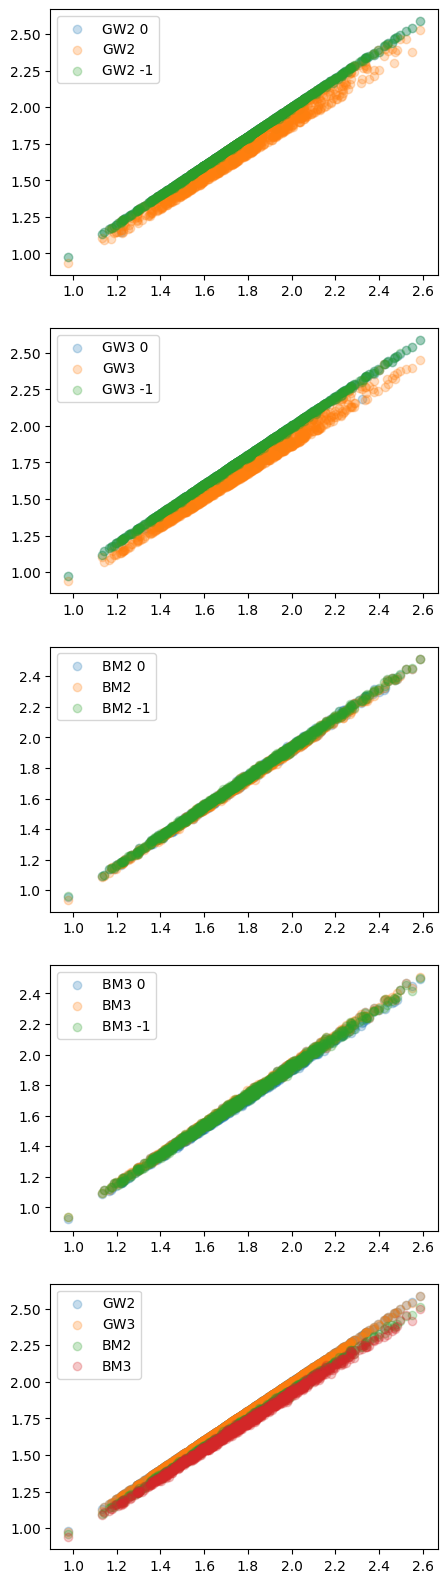

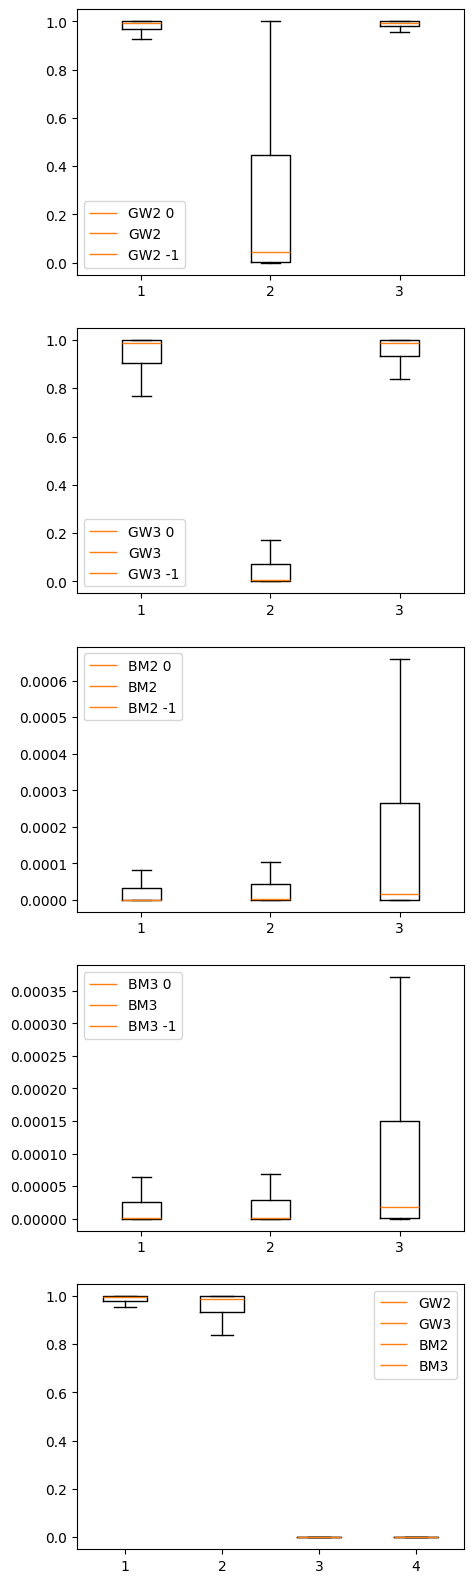

In [16]:
plot_depth0("Port_Opt",*DATA[0:3],rotation_options=rotation_options,ws_list=ws_list)

In [17]:
pkl.dump( DATA, open( "PortfolioOptDepth0.p", "wb" ) )

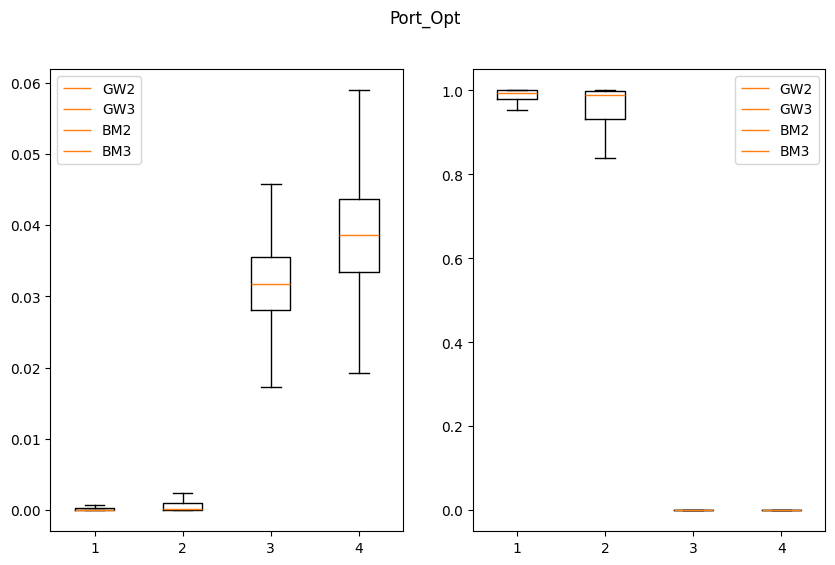

In [18]:
comparison_data=DATA[0]
M = np.array([d[6] for d in DATA[2]])
fig,ax = plt.subplots(1,2,figsize=(10,6))
plt.suptitle('Port_Opt')
ax[0].boxplot([abs(np.array(comparison_data[ws][-1]['cost'])-M)/M for ws in ws_list],0,'',label=ws_list)
ax[0].legend()
ax[1].boxplot([comparison_data[w][-1]['probs'] for w in ws_list],0,'',label=ws_list)
ax[1].legend()
plt.show()